# Data Loading, Storage, 

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## Reading and Writing Data in Text Format

In [2]:
!cat examples/ex1.csv

a,b,c,d,message
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [3]:
df = pd.read_csv('examples/ex1.csv')
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [4]:
pd.read_table('examples/ex1.csv', sep=',')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [5]:
!cat examples/ex2.csv

1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [10]:
print(pd.read_csv('examples/ex2.csv', header=None))
pd.read_csv('examples/ex2.csv', names=['a', 'b', 'c', 'd', 'message'])

   0   1   2   3      4
0  1   2   3   4  hello
1  5   6   7   8  world
2  9  10  11  12    foo


,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [8]:
names = ['a', 'b', 'c', 'd', 'message']
pd.read_csv('examples/ex2.csv', names=names, index_col='message')

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [11]:
!cat examples/csv_mindex.csv
parsed = pd.read_csv('examples/csv_mindex.csv',
                     index_col=['key1', 'key2'])
parsed

key1,key2,value1,value2
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In some cases, a table might not have a fixed delimiter, using whitespace or some other
pattern to separate fields. In these cases, you can pass a regular expression as a delimiter
for read_table. Consider a text file that looks like this:

In [12]:
list(open('examples/ex3.txt'))

['            A         B         C\n',
 'aaa -0.264438 -1.026059 -0.619500\n',
 'bbb  0.927272  0.302904 -0.032399\n',
 'ccc -0.264273 -0.386314 -0.217601\n',
 'ddd -0.871858 -0.348382  1.100491\n']

While you could do some munging by hand, in this case fields are separated by a variable
amount of whitespace. This can be expressed by the regular expression \s+, so we have
then

In [15]:
result = pd.read_table('examples/ex3.txt')
result

,A B C
0,aaa -0.264438 -1.026059 -0.619500
1,bbb 0.927272 0.302904 -0.032399
2,ccc -0.264273 -0.386314 -0.217601
3,ddd -0.871858 -0.348382 1.100491


In [16]:
result = pd.read_table('examples/ex3.txt', sep='\s+')
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [17]:
!cat examples/ex4.csv
pd.read_csv('examples/ex4.csv', skiprows=[0, 2, 3])

# hey!
a,b,c,d,message
# just wanted to make things more difficult for you
# who reads CSV files with computers, anyway?
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [20]:
!cat examples/ex5.csv
result = pd.read_csv('examples/ex5.csv')
pd.isnull(result)

something,a,b,c,d,message
one,1,2,3,4,NA
two,5,6,,8,world
three,9,10,11,12,foo


,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


Handling missing values is an important and frequently nuanced part of the file parsing
process. Missing data is usually either not present (empty string) or marked by some
sentinel value. By default, pandas uses a set of commonly occurring sentinels, such as
NA, -1.#IND, and NULL

In [21]:
result = pd.read_csv('examples/ex5.csv', na_values=['NULL'])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


The na_values option can take either a list or set of strings to consider missing values

Different NA sentinels can be specified for each column in a dict

In [22]:
sentinels = {'message': ['foo', 'NA'], 'something': ['two']}
pd.read_csv('examples/ex5.csv', na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,NaN,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


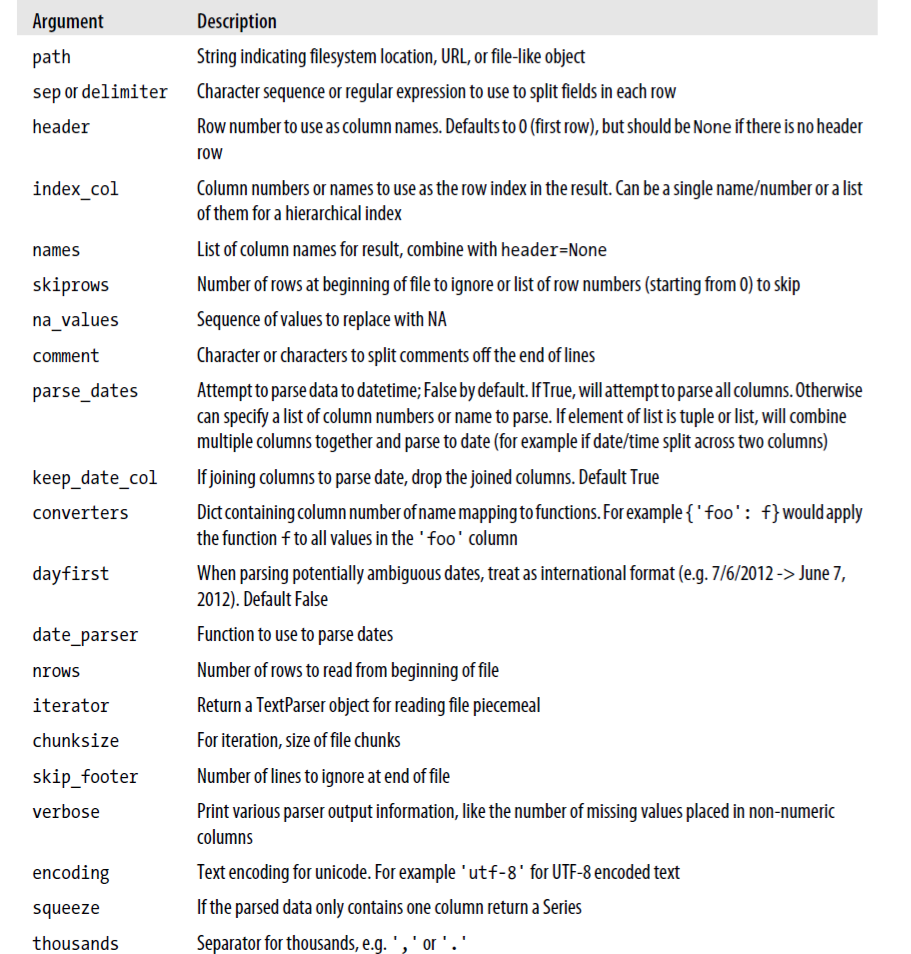

### Reading Text Files in Pieces

When processing very large files or figuring out the right set of arguments to correctly
process a large file, you may only want to read in a small piece of a file or iterate through
smaller chunks of the file

In [23]:
pd.options.display.max_rows = 10

In [24]:
result = pd.read_csv('examples/ex6.csv')
result

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
...,...,...,...,...,...
9995,2.311896,-0.417070,-1.409599,-0.515821,L
9996,-0.479893,-0.650419,0.745152,-0.646038,E
9997,0.523331,0.787112,0.486066,1.093156,K
9998,-0.362559,0.598894,-1.843201,0.887292,G


In [25]:
pd.read_csv('examples/ex6.csv', nrows=5)
# reading only 5 rows

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q


To read out a file in pieces, specify a chunksize as a number of rows

In [26]:
chunker = pd.read_csv('examples/ex6.csv', chunksize=1000)
chunker

The TextParser object returned by read_csv allows you to iterate over the parts of the
file according to the chunksize. For example, we can iterate over ex6.csv, aggregating
the value counts in the 'key' column like so:

In [27]:
chunker = pd.read_csv('examples/ex6.csv', chunksize=1000)

tot = pd.Series([])
for piece in chunker:
    tot = tot.add(piece['key'].value_counts(), fill_value=0)

tot = tot.sort_values(ascending=False)

In [28]:
tot[:10]

E    368.0
X    364.0
L    346.0
O    343.0
Q    340.0
M    338.0
J    337.0
F    335.0
K    334.0
H    330.0
dtype: float64

In [31]:
result[:10]

,one,two,three,four,key
0,0.467976,-0.038649,-0.295344,-1.824726,L
1,-0.358893,1.404453,0.704965,-0.200638,B
2,-0.501840,0.659254,-0.421691,-0.057688,G
3,0.204886,1.074134,1.388361,-0.982404,R
4,0.354628,-0.133116,0.283763,-0.837063,Q
5,1.817480,0.742273,0.419395,-2.251035,Q
6,-0.776764,0.935518,-0.332872,-1.875641,U
7,-0.913135,1.530624,-0.572657,0.477252,K
8,0.358480,-0.497572,-0.367016,0.507702,S
9,-1.740877,-1.160417,-1.637830,2.172201,G


In [29]:
tot[11:50]

I    327.0
U    326.0
P    324.0
D    320.0
A    320.0
     ...  
5    157.0
2    152.0
0    151.0
9    150.0
1    146.0
Length: 25, dtype: float64

### Writing Data to Text Format

In [32]:
data = pd.read_csv('examples/ex5.csv')
data

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


In [33]:
data.to_csv('examples/out.csv')
!cat examples/out.csv

,something,a,b,c,d,message
0,one,1,2,3.0,4,
1,two,5,6,,8,world
2,three,9,10,11.0,12,foo


In [34]:
import sys
data.to_csv(sys.stdout, sep='|')

|something|a|b|c|d|message
0|one|1|2|3.0|4|
1|two|5|6||8|world
2|three|9|10|11.0|12|foo


In [35]:
data.to_csv(sys.stdout, na_rep='NULL')

,something,a,b,c,d,message
0,one,1,2,3.0,4,NULL
1,two,5,6,NULL,8,world
2,three,9,10,11.0,12,foo


In [36]:
data.to_csv(sys.stdout, index=False, header=False)

one,1,2,3.0,4,
two,5,6,,8,world
three,9,10,11.0,12,foo


In [37]:
data.to_csv(sys.stdout, index=False, columns=['a', 'b', 'c'])

a,b,c
1,2,3.0
5,6,
9,10,11.0


In [38]:
dates = pd.date_range('1/1/2000', periods=7)
ts = pd.Series(np.arange(7), index=dates)
ts.to_csv('examples/tseries.csv')
!cat examples/tseries.csv

2000-01-01,0
2000-01-02,1
2000-01-03,2
2000-01-04,3
2000-01-05,4
2000-01-06,5
2000-01-07,6


### Working with Delimited Formats

In [39]:
!cat examples/ex7.csv

"a","b","c"
"1","2","3"
"1","2","3"


In [40]:
import csv
f = open('examples/ex7.csv')

reader = csv.reader(f)

In [41]:
for line in reader:
    print(line)

['a', 'b', 'c']
['1', '2', '3']
['1', '2', '3']


In [42]:
with open('examples/ex7.csv') as f:
    lines = list(csv.reader(f))

In [43]:
header, values = lines[0], lines[1:]

In [44]:
data_dict = {h: v for h, v in zip(header, zip(*values))}
data_dict

{'a': ('1', '1'), 'b': ('2', '2'), 'c': ('3', '3')}

class my_dialect(csv.Dialect):
    lineterminator = '\n'
    delimiter = ';'
    quotechar = '"'
    quoting = csv.QUOTE_MINIMAL

reader = csv.reader(f, dialect=my_dialect)

reader = csv.reader(f, delimiter='|')

with open('mydata.csv', 'w') as f:
    writer = csv.writer(f, dialect=my_dialect)
    writer.writerow(('one', 'two', 'three'))
    writer.writerow(('1', '2', '3'))
    writer.writerow(('4', '5', '6'))
    writer.writerow(('7', '8', '9'))

### JSON Data

In [45]:
obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

In [46]:
import json
result = json.loads(obj)
result

{'name': 'Wes',
 'places_lived': ['United States', 'Spain', 'Germany'],
 'pet': None,
 'siblings': [{'name': 'Scott', 'age': 30, 'pets': ['Zeus', 'Zuko']},
  {'name': 'Katie', 'age': 38, 'pets': ['Sixes', 'Stache', 'Cisco']}]}

In [47]:
asjson = json.dumps(result)

In [48]:
siblings = pd.DataFrame(result['siblings'], columns=['name', 'age'])
siblings

,name,age
0,Scott,30
1,Katie,38


In [49]:
!cat examples/example.json

[{"a": 1, "b": 2, "c": 3},
 {"a": 4, "b": 5, "c": 6},
 {"a": 7, "b": 8, "c": 9}]


In [50]:
data = pd.read_json('examples/example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [51]:
print(data.to_json())
print(data.to_json(orient='records'))

{"a":{"0":1,"1":4,"2":7},"b":{"0":2,"1":5,"2":8},"c":{"0":3,"1":6,"2":9}}
[{"a":1,"b":2,"c":3},{"a":4,"b":5,"c":6},{"a":7,"b":8,"c":9}]


### XML and HTML: Web Scraping

conda install lxml
pip install beautifulsoup4 html5lib

In [53]:
tables = pd.read_html('examples/fdic_failed_bank_list.html')
print(len(tables))
failures = tables[0]
failures.head()

1


,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
1,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","November 17, 2016"
2,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
3,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"
4,North Milwaukee State Bank,Milwaukee,WI,20364,First-Citizens Bank & Trust Company,"March 11, 2016","June 16, 2016"


In [54]:
close_timestamps = pd.to_datetime(failures['Closing Date'])
close_timestamps.dt.year.value_counts()

2010    157
2009    140
2011     92
2012     51
2008     25
       ... 
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing Date, Length: 15, dtype: int64

#### Parsing XML with lxml.objectify

<INDICATOR>
  <INDICATOR_SEQ>373889</INDICATOR_SEQ>
  <PARENT_SEQ></PARENT_SEQ>
  <AGENCY_NAME>Metro-North Railroad</AGENCY_NAME>
  <INDICATOR_NAME>Escalator Availability</INDICATOR_NAME>
  <DESCRIPTION>Percent of the time that escalators are operational
  systemwide. The availability rate is based on physical observations performed
  the morning of regular business days only. This is a new indicator the agency
  began reporting in 2009.</DESCRIPTION>
  <PERIOD_YEAR>2011</PERIOD_YEAR>
  <PERIOD_MONTH>12</PERIOD_MONTH>
  <CATEGORY>Service Indicators</CATEGORY>
  <FREQUENCY>M</FREQUENCY>
  <DESIRED_CHANGE>U</DESIRED_CHANGE>
  <INDICATOR_UNIT>%</INDICATOR_UNIT>
  <DECIMAL_PLACES>1</DECIMAL_PLACES>
  <YTD_TARGET>97.00</YTD_TARGET>
  <YTD_ACTUAL></YTD_ACTUAL>
  <MONTHLY_TARGET>97.00</MONTHLY_TARGET>
  <MONTHLY_ACTUAL></MONTHLY_ACTUAL>
</INDICATOR>

In [55]:
from lxml import objectify

path = 'datasets/mta_perf/Performance_MNR.xml'
parsed = objectify.parse(open(path))
root = parsed.getroot()

In [56]:
data = []

skip_fields = ['PARENT_SEQ', 'INDICATOR_SEQ',
               'DESIRED_CHANGE', 'DECIMAL_PLACES']

for elt in root.INDICATOR:
    el_data = {}
    for child in elt.getchildren():
        if child.tag in skip_fields:
            continue
        el_data[child.tag] = child.pyval
    data.append(el_data)

In [57]:
perf = pd.DataFrame(data)
perf.head()

,AGENCY_NAME,CATEGORY,DESCRIPTION,FREQUENCY,INDICATOR_NAME,INDICATOR_UNIT,MONTHLY_ACTUAL,MONTHLY_TARGET,PERIOD_MONTH,PERIOD_YEAR,YTD_ACTUAL,YTD_TARGET
0,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.9,95,1,2008,96.9,95
1,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,95,95,2,2008,96,95
2,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,96.9,95,3,2008,96.3,95
3,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,98.3,95,4,2008,96.8,95
4,Metro-North Railroad,Service Indicators,Percent of commuter trains that arrive at thei...,M,On-Time Performance (West of Hudson),%,95.8,95,5,2008,96.6,95


In [58]:
from io import StringIO
tag = '<a href="http://www.google.com">Google</a>'
root = objectify.parse(StringIO(tag)).getroot()

In [59]:
root
root.get('href')
root.text

'Google'

## Binary Data Formats

In [ ]:
frame = pd.read_csv('examples/ex1.csv')
frame
frame.to_pickle('examples/frame_pickle')

In [ ]:
pd.read_pickle('examples/frame_pickle')

In [ ]:
!rm examples/frame_pickle

### Using HDF5 Format

In [ ]:
frame = pd.DataFrame({'a': np.random.randn(100)})
store = pd.HDFStore('mydata.h5')
store['obj1'] = frame
store['obj1_col'] = frame['a']
store

In [ ]:
store['obj1']

In [ ]:
store.put('obj2', frame, format='table')
store.select('obj2', where=['index >= 10 and index <= 15'])
store.close()

In [ ]:
frame.to_hdf('mydata.h5', 'obj3', format='table')
pd.read_hdf('mydata.h5', 'obj3', where=['index < 5'])

In [ ]:
os.remove('mydata.h5')

### Reading Microsoft Excel Files

In [ ]:
xlsx = pd.ExcelFile('examples/ex1.xlsx')

In [ ]:
pd.read_excel(xlsx, 'Sheet1')

In [ ]:
frame = pd.read_excel('examples/ex1.xlsx', 'Sheet1')
frame

In [ ]:
writer = pd.ExcelWriter('examples/ex2.xlsx')
frame.to_excel(writer, 'Sheet1')
writer.save()

In [ ]:
frame.to_excel('examples/ex2.xlsx')

In [ ]:
!rm examples/ex2.xlsx

## Interacting with Web APIs

In [ ]:
import requests
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
resp

In [ ]:
data = resp.json()
data[0]['title']

In [ ]:
issues = pd.DataFrame(data, columns=['number', 'title',
                                     'labels', 'state'])
issues

## Interacting with Databases

In [ ]:
import sqlite3
query = """
CREATE TABLE test
(a VARCHAR(20), b VARCHAR(20),
 c REAL,        d INTEGER
);"""
con = sqlite3.connect('mydata.sqlite')
con.execute(query)
con.commit()

In [ ]:
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)]
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()

In [ ]:
cursor = con.execute('select * from test')
rows = cursor.fetchall()
rows

In [ ]:
cursor.description
pd.DataFrame(rows, columns=[x[0] for x in cursor.description])

In [ ]:
import sqlalchemy as sqla
db = sqla.create_engine('sqlite:///mydata.sqlite')
pd.read_sql('select * from test', db)

In [ ]:
!rm mydata.sqlite

## Conclusion